# Data Preprocessing

The goal of this lab is to introduce you to data preprocessing techniques in order to make your data suitable for applying a learning algorithm.

## 1. Handling Missing Values

A common (and very unfortunate) data property is the ocurrence of missing and erroneous values in multiple features in our dataset.
Download the dataset and corresponding information from the <a href="http://www.cs.uni-potsdam.de/ml/teaching/ss15/ida/uebung02/abalone.csv">course website</a>.

To determine the age of a abalone snail you have to kill the snail and count the annual
rings. You are told to estimate the age of a snail on the basis of the following attributes:
1. type: male (0), female (1) and infant (2)
2. length in mm
3. width in mm
4. height in mm
5. total weight in grams
6. weight of the meat in grams
7. drained weight in grams
8. weight of the shell in grams
9. number of annual rings (number of rings +1, 5 yields age)

However, these data is incomplete. Missing values are marked with −1.

In [1]:
import pandas as pd

# load data 
df = pd.read_csv("http://www.cs.uni-potsdam.de/ml/teaching/ss15/ida/uebung02/abalone.csv")
df.columns=['type','length','width','height','total_weight','meat_weight','drained_weight','shell_weight','num_rings']
df.head()

,type,length,width,height,total_weight,meat_weight,drained_weight,shell_weight,num_rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,-1
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,2,-1.000,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,2,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


### Exercise 1.1

Compute the mean of all positive numbers of each numeric column and the counts of each category.

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [76]:
X = df.loc[df["type"] > 0,"length":].values
y = df.loc[df["type"] > 0,"type"].values
X_missing = df.loc[df["type"] < 0,"length":].values
y_missing = df.loc[df["type"] < 0,"type"].values

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.21, random_state=42, stratify=y )

In [162]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
print(knn.score(X_test, y_test))

0.8363970588235294


In [158]:
#search for the best number of neighbours
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

In [159]:
test_accuracy

array([0.74632353, 0.78308824, 0.80330882, 0.80882353, 0.83639706,
       0.83272059, 0.82904412, 0.82352941, 0.83088235])

In [160]:
#search for the index of the max
test_accuracy.argmax(axis=0)

4

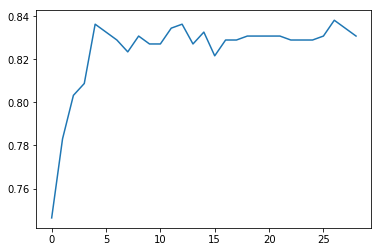

In [137]:
plt.plot(test_accuracy)

### Exercise 1.2

Compute the median of all positive numbers of each numeric column.

### Exercise 1.3

Handle the missing values in a way that you find suitable. Argue your choices.

### Exercise 1.4

Perform Z-score normalization on every column (except the type of course!)

In [ ]:
##################
#INSERT CODE HERE#
##################

## 2. Preprocessing text (Optional)

One possible way to transform text documents into vectors of numeric attributes is to use the TF-IDF representation. We will experiment with this representation using the 20 Newsgroup data set. The data set contains postings on 20 different topics. The classification problem is to decide which of the topics a posting falls into. Here, we will only consider postings about medicine and space.

In [2]:
from sklearn.datasets import fetch_20newsgroups


categories = ['sci.med', 'sci.space']
raw_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
print('The index of each category is: {}'.format([(i,target) for i,target in enumerate(raw_data.target_names)]))

The index of each category is: [(0, 'sci.med'), (1, 'sci.space')]


Check out some of the postings, might find some funny ones!

In [4]:
import numpy as np
idx = np.random.randint(0, len(raw_data.data))
print ('This is a {} email.\n'.format(raw_data.target_names[raw_data.target[idx]]))
print ('There are {} emails.\n'.format(len(raw_data.data)))
print(raw_data.data[idx])

This is a sci.med email.

There are 1187 emails.

From: geb@cs.pitt.edu (Gordon Banks)
Subject: Re: Donating organs
Reply-To: geb@cs.pitt.edu (Gordon Banks)
Organization: Univ. of Pittsburgh Computer Science
Lines: 24

In article <1993Mar25.161109.13101@sbcs.sunysb.edu> mhollowa@ic.sunysb.edu (Michael Holloway) writes:

>Dr. Banks, 
>	I don't know if you make a point of keeping up with liver transplant
>research but you're certainly in the right place for these questions.  Has 
>there been anything recent in "Transplant Proceedings" or somesuch, on 
>xenografts?  How about liver section transplants from living donors? 
>

I'm sure the Pittsburgh group has published the baboon work, but I
don't know where.  In Chicago they were doing lobe transplants from
living donors, and I'm sure they've published.  I don't read the
transplant literature.  I just see the liver transplant patients
when they get into neurologic trouble (pretty frequent), so that
and the newspapers and scuttlebutt is th

Lets pick the first 10 postings from each category

In [5]:
idxs_med = np.flatnonzero(raw_data.target == 0)
idxs_space = np.flatnonzero(raw_data.target == 1)
idxs = np.concatenate([idxs_med[:10],idxs_space[:10]])
data = np.array(raw_data.data)
data = data[idxs]

<a href="http://www.nltk.org/">NLTK</a> is a toolkit for natural language processing. Take some time to install it and go through this <a href="http://www.slideshare.net/japerk/nltk-in-20-minutes">short tutorial/presentation</a>.

The downloaded package below is a tokenizer that divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

In [6]:
import nltk
import itertools
nltk.download('punkt')

# Tokenize the sentences into words
tokenized_sentences = [nltk.word_tokenize(sent) for sent in data]
vocabulary_size = 1000
unknown_token = 'unknown'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janle\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [ ]:
# Count the word frequencies
word_freq = nltk.FreqDist(itertools.chain(*tokenized_sentences))
print ("Found %d unique words tokens." % len(word_freq.items()))

In [ ]:
# Get the most common words and build index_to_word and word_to_index vectors
vocab = word_freq.most_common(vocabulary_size-1)
index_to_word = [x[0] for x in vocab]
index_to_word.append(unknown_token)
word_to_index = dict([(w,i) for i,w in enumerate(index_to_word)])
 
print ("Using vocabulary size %d." % vocabulary_size)
print ("The least frequent word in our vocabulary is '%s' and appeared %d times." % (vocab[-1][0], vocab[-1][1]))

### Exercise 2.1

Code your own TF-IDF representation function and use it on this dataset. (Don't use code from libraries. Build your own function with Numpy/Pandas). Use the formular TFIDF = TF * (IDF+1). The effect of adding “1” to the idf in the equation above is that terms with zero idf, i.e., terms that occur in all documents in a training set, will not be entirely ignored.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer()
df = pd.DataFrame(countvec.fit_transform(data).toarray(), columns=countvec.get_feature_names())

def tfidf(df):
    
    ##################
    #INSERT CODE HERE#
    ##################
    
    return rep

rep = tfidf(df)

# Check if your implementation is correct
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(norm=None, smooth_idf=False, use_idf=True)
X_train = pd.DataFrame(vectorizer.fit_transform(data).toarray(), columns=countvec.get_feature_names())
answer=['No','Yes']
if rep is not None:
    print ('Is this implementation correct?\nAnswer: {}'.format(answer[1*np.all(X_train == rep)]))